## 0. python imports

In [1]:
from IPython.display import set_matplotlib_formats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
set_matplotlib_formats('svg')

## 1. data loading

In [2]:
breadbasket = pd.read_csv('./data/BreadBasket_DMS.csv.zip')

In [3]:
breadbasket.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [5]:
breadbasket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 4.1 MB


In [6]:
breadbasket.describe()

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

## 2. guided lesson

create datetime variable combining date and time:

In [7]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket['Date'] + ' ' + breadbasket['Time'], 
                                         format="%Y-%m-%d %H:%M:%S")

get unique products and count:

In [9]:
breadbasket['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [10]:
breadbasket['Item'].nunique()

95

In [11]:
breadbasket['Item'].value_counts().nlargest(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

get categories for products:

In [12]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

other_food = [x for x in breadbasket.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

breadbasket['beverage'] = np.where(breadbasket.Item.isin(beverage), 1, 0)
breadbasket['other'] = np.where(breadbasket.Item.isin(other), 1, 0)
breadbasket['kids'] = np.where(breadbasket.Item.isin(kids), 1, 0)
breadbasket['snacks'] = np.where(breadbasket.Item.isin(snacks), 1, 0)
breadbasket['bread'] = np.where(breadbasket.Item.isin(bread), 1, 0)
breadbasket['breakfast_pastry'] = np.where(breadbasket.Item.isin(breakfast_pastry), 1, 0)
breadbasket['dessert'] = np.where(breadbasket.Item.isin(dessert), 1, 0)
breadbasket['condiments'] = np.where(breadbasket.Item.isin(condiments), 1, 0)
breadbasket['breakfast'] = np.where(breadbasket.Item.isin(breakfast), 1, 0)
breadbasket['lunch'] = np.where(breadbasket.Item.isin(lunch), 1, 0)
breadbasket['other_food'] = np.where(breadbasket.Item.isin(other_food), 1, 0)

breadbasket.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  
0           0          0      0           0  
1           0          0      0           0  
2           0          0      0           0  
3           0          0      0           0  
4           1          0      0           0

combine transactions (are uniquely identified by datetime and transaction id)

In [13]:
bread_group = breadbasket.groupby(['DateTime', 'Transaction']).sum()
bread_group.head()

beverage  other  kids  snacks  bread  \
DateTime            Transaction                                         
2016-10-30 09:58:11 1                   0      0     0       0      1   
2016-10-30 10:05:34 2                   0      0     0       0      2   
2016-10-30 10:07:57 3                   1      0     0       0      0   
2016-10-30 10:08:41 4                   0      0     0       0      0   
2016-10-30 10:13:03 5                   1      0     0       0      1   

                                 breakfast_pastry  dessert  condiments  \
DateTime            Transaction                                          
2016-10-30 09:58:11 1                           0        0           0   
2016-10-30 10:05:34 2                           0        0           0   
2016-10-30 10:07:57 3                           0        1           1   
2016-10-30 10:08:41 4                           1        0           0   
2016-10-30 10:13:03 5                           1        0           0   

                                 breakfast  lunch  other_food  
DateTime            Transaction                                
2016-10-30 09:58:11 1                    0      0           0  
2016-10-30 10:05:34 2                    0      0           0  
2016-10-30 10:07:57 3                    0      0           0  
2016-10-30 10:08:41 4                    0      0           0  
2016-10-30 10:13:03 5                    0      0           0

In [14]:
bread_group.shape

(9531, 11)

reset index and let only transaction as id:

In [15]:
bread_group.reset_index(level='DateTime', inplace=True)

In [16]:
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food  
Transaction              
1                     0  
2                     0  
3                     0  
4                     0  
5                     0

get hour and weekday columns:

In [17]:
bread_group['day'] = bread_group['DateTime'].dt.day_name()
bread_group['hour'] = bread_group['DateTime'].dt.hour

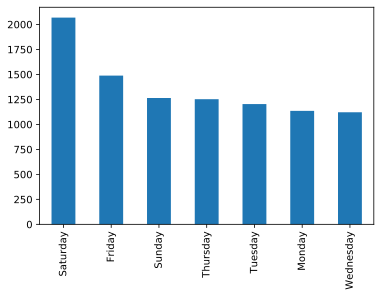

In [18]:
bread_group['day'].value_counts().plot(kind='bar');

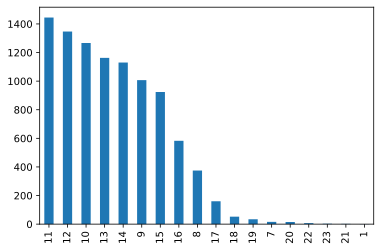

In [19]:
bread_group['hour'].value_counts().plot.bar();

ohe for week days to prepare for clustering:

In [20]:
bread_dummy = pd.get_dummies(data=bread_group, columns=['day']).drop('DateTime', axis=1)
bread_dummy.head()

beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
Transaction                                                                    
1                   0      0     0       0      1                 0        0   
2                   0      0     0       0      2                 0        0   
3                   1      0     0       0      0                 0        1   
4                   0      0     0       0      0                 1        0   
5                   1      0     0       0      1                 1        0   

             condiments  breakfast  lunch  other_food  hour  day_Friday  \
Transaction                                                               
1                     0          0      0           0     9           0   
2                     0          0      0           0    10           0   
3                     1          0      0           0    10           0   
4                     0          0      0           0    10           0   
5                     0          0      0           0    10           0   

             day_Monday  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
Transaction                                                                    
1                     0             0           1             0            0   
2                     0             0           1             0            0   
3                     0             0           1             0            0   
4                     0             0           1             0            0   
5                     0             0           1             0            0   

             day_Wednesday  
Transaction                 
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

dimensionality reduction:

* PCA:

In [21]:
from sklearn.decomposition import PCA
n_components = 4

pca = PCA(n_components)
pc = pca.fit_transform(bread_dummy)
pc_df = pd.DataFrame(pc, columns=[f'pc_{i+1}' for i in range(n_components)])

In [22]:
pc_df.head()

pc_1      pc_2      pc_3      pc_4
0  3.197413 -0.926669  0.244942  0.005975
1  2.227896 -1.274345  1.183378 -0.159235
2  2.107647  0.424876 -0.219995  0.879907
3  2.198960 -0.580674 -0.783344 -0.031008
4  2.206812  0.037386  0.443752 -0.333646

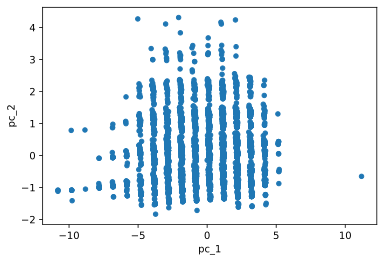

In [24]:
pc_df.plot.scatter(x='pc_1', y='pc_2');

* TSNE

In [25]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, perplexity=15)
embedding = tsne.fit_transform(bread_dummy)
embedding_df = pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(n_components)])

In [447]:
embedding_df.head()

emb_1      emb_2
0  60.232464 -41.129772
1  55.294357 -28.111092
2  42.989216 -37.873486
3  53.834999 -21.781122
4  46.433468 -26.233175

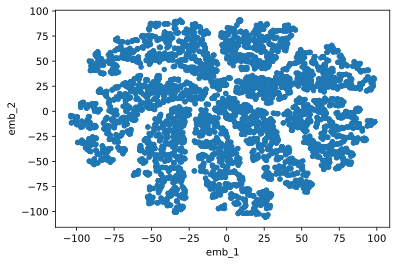

In [26]:
embedding_df.plot.scatter(x='emb_1', y='emb_2');

* UMAP

In [27]:
import warnings
from umap import UMAP
n_components = 2
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    umap = UMAP(n_components=n_components)
    embedding = umap.fit_transform(bread_dummy)
    embedding_df = pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(n_components)])

In [28]:
embedding_df.head()

emb_1     emb_2
0  8.051826  3.160889
1  9.197334  3.175303
2  8.629837  4.121649
3  9.027469  3.694654
4  8.969541  3.754189

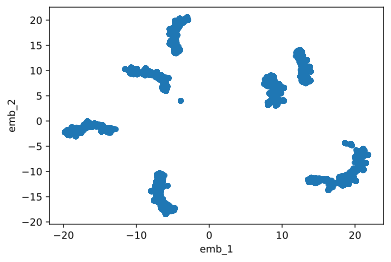

In [29]:
embedding_df.plot.scatter(x='emb_1', y='emb_2');

clustering:

* k-means

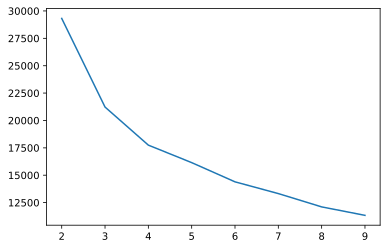

In [31]:
from sklearn.cluster import KMeans

inertia = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 10), inertia);

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc_df);

In [33]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pc_df, kmeans.predict(pc_df)))

Silhouette Coefficient: 0.363


In [36]:
kmeans.cluster_centers_

array([[-2.92218455e+00,  3.92461059e-04,  1.84064759e-02,
         6.23502782e-03],
       [ 2.84929380e+00, -9.92513661e-03, -8.66258888e-04,
        -1.01864462e-04],
       [ 2.29415865e-01,  6.40160620e-03, -1.29591400e-02,
        -4.51892801e-03]])

predict clusters and create column in original df:

In [37]:
bread_group['label'] = kmeans.predict(pc_df)
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food     day  hour  label  
Transaction                                   
1                     0  Sunday     9      1  
2                     0  Sunday    10      1  
3                     0  Sunday    10      1  
4                     0  Sunday    10      1  
5                     0  Sunday    10      1

add label column to original dataframe:

In [38]:
bread_merged = breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']], 
                                 on='Transaction', 
                                 how='left')
bread_merged.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  label  
0           0          0      0           0      1  
1           0          0      0           0      1  
2           0          0      0           0      1  
3           0          0      0           0      1  
4           1          0      0           0      1

cluster analytics:

In [39]:
# elements in clusters
bread_merged['label'].value_counts()

2    9013
0    6777
1    5503
Name: label, dtype: int64

In [40]:
# transactions clusters by hourb
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['label']).style.background_gradient(cmap=cm)

In [41]:
pd.crosstab(bread_group['day'], bread_group['label']).style.background_gradient(cmap=cm)

In [42]:
bread_merged \
    .groupby('label')['Item'] \
    .value_counts() \
    .to_frame("counts") \
    .reset_index() \
    .set_index('Item') \
    .groupby('label')['counts'] \
    .nlargest()

label  Item     
0      Coffee       1563
       Bread         901
       Tea           615
       Cake          510
       Sandwich      280
1      Coffee       1615
       Bread        1082
       Pastry        453
       Medialuna     294
       Tea           280
2      Coffee       2293
       Bread        1342
       Tea           540
       Sandwich      449
       NONE          440
Name: counts, dtype: int64

* DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

In [44]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pc_df, dbscan.fit_predict(pc_df)))

Silhouette Coefficient: 0.819


predict clusters and create column in original df:

In [45]:
bread_group['label'] = dbscan.fit_predict(pc_df)
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food     day  hour  label  
Transaction                                   
1                     0  Sunday     9      0  
2                     0  Sunday    10      1  
3                     0  Sunday    10      2  
4                     0  Sunday    10      3  
5                     0  Sunday    10      4

add label column to original dataframe:

In [46]:
bread_merged = breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']], 
                                 on='Transaction', 
                                 how='left')
bread_merged.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  label  
0           0          0      0           0      0  
1           0          0      0           0      1  
2           0          0      0           0      1  
3           0          0      0           0      2  
4           1          0      0           0      2

cluster analytics:

In [47]:
# elements in clusters
bread_merged['label'].value_counts()

-1      1806
 22      570
 17      534
 8       506
 14      500
 32      457
 39      455
 45      412
 11      364
 5       359
 6       358
 20      347
 0       336
 18      330
 67      308
 51      300
 19      294
 53      280
 12      279
 4       276
 40      244
 50      230
 38      228
 21      221
 104     219
 30      218
 34      210
 70      208
 98      203
 124     199
        ... 
 142      24
 71       24
 129      24
 169      24
 35       24
 112      23
 126      23
 178      22
 179      21
 156      20
 181      20
 151      19
 184      19
 106      18
 62       18
 140      18
 160      17
 36       17
 175      17
 164      17
 90       15
 91       15
 57       14
 109      14
 170      13
 96       13
 54       13
 163      12
 171      10
 185       5
Name: label, Length: 187, dtype: int64

In [48]:
# transactions clusters by hourb
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['label']).style.background_gradient(cmap=cm)

In [49]:
pd.crosstab(bread_group['day'], bread_group['label']).style.background_gradient(cmap=cm)

In [50]:
bread_merged \
    .groupby('label')['Item'] \
    .value_counts() \
    .to_frame("counts") \
    .reset_index() \
    .set_index('Item') \
    .groupby('label')['counts'] \
    .nlargest()

label  Item         
-1     Coffee           366
       Bread            279
       Cake             137
       Cookies          107
       Tea              103
 0     Bread            208
       Pastry            46
       Medialuna         14
       NONE              13
       Baguette          10
 1     Bread             54
       Scandinavian       6
       Toast              6
       Focaccia           5
       NONE               5
 2     Coffee            43
       Cake              17
       Cookies           17
       Tea               12
       Brownie            8
 3     Farm House        36
       Pastry            26
       Medialuna         12
       Muffin            10
       Jam                6
 4     Bread             75
       Coffee            68
       Pastry            21
       Tea               20
       Toast             19
                       ... 
 179   Cookies            5
       Cake               3
       Tea                2
       Alfajores          1

* HDBSCAN

In [51]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=25)

/home/david/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/david/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pc_df, hdbscan.fit_predict(pc_df)))

Silhouette Coefficient: 0.490


predict clusters and create column in original df:

In [53]:
bread_group['label'] = hdbscan.fit_predict(pc_df)
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food     day  hour  label  
Transaction                                   
1                     0  Sunday     9     -1  
2                     0  Sunday    10     11  
3                     0  Sunday    10     19  
4                     0  Sunday    10     14  
5                     0  Sunday    10     22

add label column to original dataframe:

In [54]:
bread_merged = breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']], 
                                 on='Transaction', 
                                 how='left')
bread_merged.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  label  
0           0          0      0           0     -1  
1           0          0      0           0     11  
2           0          0      0           0     11  
3           0          0      0           0     19  
4           1          0      0           0     19

cluster analytics:

In [55]:
# elements in clusters
bread_merged['label'].value_counts()

-1      6999
 89      570
 66      534
 79      457
 73      412
 18      359
 64      330
 82      312
 95      308
 67      294
 84      280
 71      279
 22      276
 23      244
 21      228
 59      227
 77      219
 83      216
 91      212
 86      203
 69      201
 68      199
 87      198
 94      197
 78      188
 76      187
 70      183
 60      174
 97      172
 54      168
        ... 
 37       48
 16       48
 111      47
 9        47
 43       44
 26       43
 48       41
 101      40
 58       40
 108      40
 30       39
 29       39
 35       37
 6        36
 112      36
 45       35
 39       35
 46       34
 42       33
 114      33
 106      32
 104      31
 113      30
 107      29
 38       29
 24       28
 47       28
 49       27
 50       26
 110      26
Name: label, Length: 116, dtype: int64

In [56]:
# transactions clusters by hourb
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['label']).style.background_gradient(cmap=cm)

In [57]:
pd.crosstab(bread_group['day'], bread_group['label']).style.background_gradient(cmap=cm)

In [58]:
bread_merged \
    .groupby('label')['Item'] \
    .value_counts() \
    .to_frame("counts") \
    .reset_index() \
    .set_index('Item') \
    .groupby('label')['counts'] \
    .nlargest()

label  Item            
-1     Coffee              1493
       Bread               1140
       Cake                 458
       Tea                  399
       Cookies              280
 0     Bread                 48
       Scandinavian           9
       Baguette               7
       NONE                   4
       Pastry                 4
 1     Bread                 26
       Brownie                8
       Alfajores              7
       Scandinavian           7
       Cake                   6
 2     Cake                  18
       Fudge                  9
       Brownie                8
       Pastry                 6
       Cookies                5
 3     Farm House            43
       Pastry                18
       Medialuna             13
       Muffin                11
       NONE                   8
 4     Coffee                36
       Bread                 26
       Toast                 14
       Pastry                 8
       Tea                    5
                

* GMM

In [59]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, covariance_type='full')

In [60]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pc_df, gm.fit_predict(pc_df)))

Silhouette Coefficient: -0.009


predict clusters and create column in original df:

In [61]:
bread_group['label'] = gm.fit_predict(pc_df)
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  \
Transaction                                                            
1                           0        0           0          0      0   
2                           0        0           0          0      0   
3                           0        1           1          0      0   
4                           1        0           0          0      0   
5                           1        0           0          0      0   

             other_food     day  hour  label  
Transaction                                   
1                     0  Sunday     9      1  
2                     0  Sunday    10      1  
3                     0  Sunday    10      2  
4                     0  Sunday    10      1  
5                     0  Sunday    10      3

add label column to original dataframe:

In [62]:
bread_merged = breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']], 
                                 on='Transaction', 
                                 how='left')
bread_merged.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  other_food  label  
0           0          0      0           0      1  
1           0          0      0           0      1  
2           0          0      0           0      1  
3           0          0      0           0      2  
4           1          0      0           0      2

cluster analytics:

In [63]:
# elements in clusters
bread_merged['label'].value_counts()

2    8041
3    5430
0    4120
1    3702
Name: label, dtype: int64

In [64]:
# transactions clusters by hourb
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['label']).style.background_gradient(cmap=cm)

In [65]:
pd.crosstab(bread_group['day'], bread_group['label']).style.background_gradient(cmap=cm)

In [66]:
bread_merged \
    .groupby('label')['Item'] \
    .value_counts() \
    .to_frame("counts") \
    .reset_index() \
    .set_index('Item') \
    .groupby('label')['counts'] \
    .nlargest()

label  Item        
0      Bread            905
       Coffee           781
       Cake             263
       Tea              223
       Cookies          172
1      Bread           1776
       Farm House       267
       Pastry           248
       Scandinavian     194
       Medialuna        161
2      Coffee          2489
       Cake             762
       Tea              732
       Cookies          368
       Sandwich         359
3      Coffee          2201
       Bread            644
       Tea              480
       NONE             281
       Pastry           241
Name: counts, dtype: int64